---
# Classificação de Demandas do Fala.BR - LLM (DistilBERT)
Projeto do Bootcamp Machine Learning (Anderson Monteiro e Léo Maranhão de Mello)
---
## Introdução
### Descrição do projeto de Machine Learning

**I Descrição do problema ou tarefa**: O problema consiste em classificar as demandas recebidas pela Ouvidoria da SUSEP, por meio do sistema Fala.BR.

**II Descrição da solução de IA:** Utilizaremos um processamento de NLP e testaremos modelos de regressão logística e Random Forest para classificação. A solução incluirá uma pipeline que realiza pré-processamento, treinamento e avaliação do modelo.

**III Fonte de dados:** A Ouvidoria forneceu um dataset com 1531 textos das demandas e suas classificações, no formato de planilha ODS. A classificação dos textos foi realizada pela própria Ouvidoria.

**IV Variáveis independentes (preditoras ou "features"):** A variável independente é o texto recebido do Fala.BR.

**V Variável dependente (resposta ou "target"):** A variável dependente é a classificação do texto em uma das 17 classificações utilizadas pela Ouvidoria:

*Cadastro
*Capitalização
*Consulta Técnica

Classificação de Demandas do Fala.BR - SMOTE com ChatGPT
Projeto do Bootcamp Machine Learning (Anderson Monteiro e Léo Maranhão de Mello)

Introdução
Descrição do projeto de machine learning
1- Descrição do problema ou tarefa: O problema consiste em classificar as demandas recebidas pela Ouvidoria da SUSEP, por meio do sistema Fala.BR.

2- Descrição da solução de IA: Utilizaremos um processamento de NLP e testaremos modelos de regressão logística e Random Forest para classificação. A solução incluirá uma pipeline que realiza pré-processamento, treinamento e avaliação do modelo.

3- Fonte de dados: A Ouvidoria forneceu um dataset com 1531 textos das demandas e suas classificações, no formato de planilha ODS. A classificação dos textos foi realizada pela própria Ouvidoria.

4- Variáveis independentes (preditoras ou "features"): A variável independente é o texto recebido do Fala.BR.

5- Variável dependente (resposta ou "target"): A variável dependente é a classificação do texto em uma das 17 classificações utilizadas pela Ouvidoria:


Classificação de Demandas do Fala.BR - SMOTE com ChatGPT
Projeto do Bootcamp Machine Learning (Anderson Monteiro e Léo Maranhão de Mello)

Introdução
Descrição do projeto de machine learning
1- Descrição do problema ou tarefa: O problema consiste em classificar as demandas recebidas pela Ouvidoria da SUSEP, por meio do sistema Fala.BR.

2- Descrição da solução de IA: Utilizaremos um processamento de NLP e testaremos modelos de regressão logística e Random Forest para classificação. A solução incluirá uma pipeline que realiza pré-processamento, treinamento e avaliação do modelo.

3- Fonte de dados: A Ouvidoria forneceu um dataset com 1531 textos das demandas e suas classificações, no formato de planilha ODS. A classificação dos textos foi realizada pela própria Ouvidoria.

4- Variáveis independentes (preditoras ou "features"): A variável independente é o texto recebido do Fala.BR.

5- Variável dependente (resposta ou "target"): A variável dependente é a classificação do texto em uma das 17 classificações utilizadas pela Ouvidoria:

* Cadastro
* Capitalização
* Consulta Técnica
* DPVAT/SPVAT
* Não identificada
* Previdência Complementar Aberta
* Seguro Compreensivo
* Seguro de Automoveis
* Seguro de Crédito Interno
* Seguro de Danos
* Seguro de Pessoas
* Seguro de Responsabilidade
* Seguro de Transportes
* Seguro Fiança Locatícia
* Seguro Garantia
* Seguro Garantia Estendida
* Seguro RuralCadastro
* Capitalização
* Consulta Técnica
* DPVAT/SPVAT
* Não identificada
* Previdência Complementar Aberta
* Seguro Compreensivo
* Seguro de Automoveis
* Seguro de Crédito Interno
* Seguro de Danos
* Seguro de Pessoas
* Seguro de Responsabilidade
* Seguro de Transportes
* Seguro Fiança Locatícia
* Seguro Garantia
* Seguro Garantia Estendida
* Seguro RuralDPVAT/SPVAT
* Não identificada
* Previdência Complementar Aberta
* Seguro Compreensivo
* Seguro de Automoveis
* Seguro de Crédito Interno
* Seguro de Danos
* Seguro de Pessoas
* Seguro de Responsabilidade
* Seguro de Transportes
* Seguro Fiança Locatícia
* Seguro Garantia
* Seguro Garantia Estendida
* Seguro Rural

## Solução de IA
Para fins de comparação com a solução em ML, utilizaremos uma solução em LLM, além de alguns testes sobre aumento de dados (data aumengtation). A LLM escolhida foi a DistilBERT, que necessariamente não desempenha melhor que a google-bert/bert-base-uncased, mas consegue entregar ótimos resultados com otimização de 60% na execução.

In [3]:
# bibliotecas internas
import os

# bibliotecas padrão
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments

# PyTorch
import torch
from torch.utils.data import DataLoader, TensorDataset

# outros
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

!pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=76d1007ef66eadcce02bcfe9d8103a4719730591f426a97dd5a6f938f744f41f
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


## Carga dos Dados

In [4]:
# Monta o Google Drive
drive.mount('/content/drive')

# Cria o dataframe de trabalho
df = pd.DataFrame()

# Le os arquivos de dados e monta a estrutura
directory = os.fsencode("/content/drive/MyDrive/Colab Notebooks/MVP/data/")
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("todas_demandas"):
        df_temp = pd.read_excel(f"/content/drive/MyDrive/Colab Notebooks/MVP/data/{filename}")
        df = pd.concat([df, df_temp])

# Exibe a estrutura montada
display(df.sample(5))
display(df.shape)

Mounted at /content/drive


,Demanda,Categoria
129,Ao revisar as cláusulas do contrato de seguro ...,Seguro de Danos
350,Preciso alterar o perfil de investimento do me...,Previdência Complementar Aberta
47,Solicito mais informações sobre a cobertura co...,Outros
345,Realizei a compra do seguros de auto em 33.33....,Seguro de Automoveis
15,A empresa não atualizou meus dados na apólice ...,Seguro de Pessoas


(2966, 2)

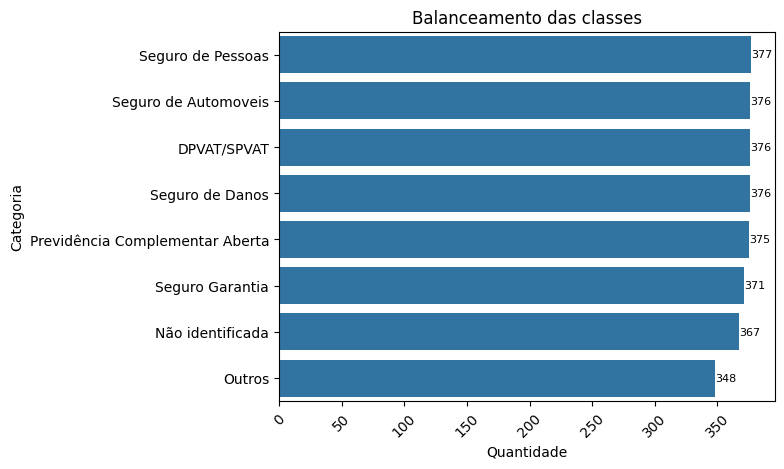

In [5]:
# Mostrar gráfico com o balanceamento das classes
ax = sns.countplot(y='Categoria', data=df, order=df['Categoria'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=8)
plt.xticks(rotation=45)
plt.title('Balanceamento das classes')
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.show()

## Pre-processamento

In [6]:
# Transforma os valores de target de texto para numero
le = LabelEncoder()
df['Categoria'] = le.fit_transform(df['Categoria'])

In [7]:
# Separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['Demanda'], df['Categoria'], test_size=0.2, random_state=1)

In [8]:
# Cria os tokens
model_name = "neuralmind/bert-base-portuguese-cased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.


In [9]:
# Separa os arquivos de texto em treino e teste
train_texts = X_train.tolist()
test_texts = X_test.tolist()

In [10]:
# Transforma os valores de texto em  sequencias de numeros
train_encodings = tokenizer(train_texts, max_length=512, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, max_length=512, truncation=True, padding=True)

In [11]:
class TicketDataset(torch.utils.data.Dataset):
# Classe básica para pegar o par texto x target e mandar para o pytorch
# Pytorch é necessário aqui como um ferramental para pegar os tokens e treinar
# no LLM
    def __init__(self, encodings, labels): # inicializa os parametros
        self.encodings = encodings
        self.labels = labels
    def __len__(self): # retorna quantidade de labels quando chamada por len()
        return len(self.labels)
    def __getitem__(self, idx): # retorna um item quando chamada por []
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [12]:
# Cria os datasets
train_dataset = TicketDataset(train_encodings, y_train.tolist())
test_dataset = TicketDataset(test_encodings, y_test.tolist())

In [13]:
# essa bosta eh um dict contendo os tensors e os labels
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_))

You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.0.attention.k_lin.weight', 'transformer.layer.0.attention.out_lin.bias', 'transformer.layer.0.attention.out_lin.weight', 'transformer.layer.0.attention.q_lin.bias', 'transformer.layer.0.attention.q_lin.weight', 'transformer.layer.0.attention.v_lin.bias', 'transformer.layer.0.attention.v_lin.weight', 'transformer.layer.0.ffn.lin1.bias', 'transformer.layer.0.ffn.lin1.weight', 'transformer.layer.0.ffn.lin2.bias', 'transformer.layer.0.ffn.lin2.weight', 'transformer.layer.0.output_layer_norm.bias', 'transformer.layer.0.output_layer_norm.weigh

In [14]:
# configuracoes de treinamento
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # aumenta a taxa de aprendizado a cada step
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# simplifica o loop de treinamento (aquela parte do loop)
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset             # evaluation dataset
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

In [ ]:
preds_output = trainer.predict(test_dataset)

In [ ]:
preds = torch.argmax(torch.tensor(preds_output.predictions), dim=1)

y_pred = preds.numpy()
y_true = y_test.to_numpy()

print("Relatorio de Classificacao:\n", classification_report(y_true, y_pred, target_names=le.classes_))
print("Acuracia:", accuracy_score(y_true, y_pred))

In [ ]:
trainer.evaluate()